### Import dos pacotes necessários

In [121]:
#### Pacotes Básicos ####
import sklearn
import pandas as pd
import numpy as np
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline

#### Pacotes de Modelagem ####

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#### Pacotes para métricas a avalição de modelo ###

from sklearn import model_selection
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy.stats import ks_2samp
from time import time
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, make_scorer, log_loss
from sklearn.metrics import roc_curve

#### Pacotes Gráficos ####

import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

#### Pacotes para Balanceamento de amostra ####
from imblearn.under_sampling import RandomUnderSampler

### Import dos dados

In [9]:
arquivo = pd.read_csv("creditcard.csv")

In [10]:
arquivo.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
arquivo.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Análise exploratória

In [12]:
exploratoria = sv.analyze(arquivo)

In [13]:
exploratoria.show_html('exploratoria.html')

Report exploratoria.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##### Comparação Amount - Fraudulentas e não fraudulentas

In [17]:
class1 = arquivo.loc[arquivo['Class'] == 1]
class0 = arquivo.loc[arquivo['Class'] == 0]

In [18]:
class1['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
class0['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

<AxesSubplot:title={'center':'Amount'}, xlabel='Class'>

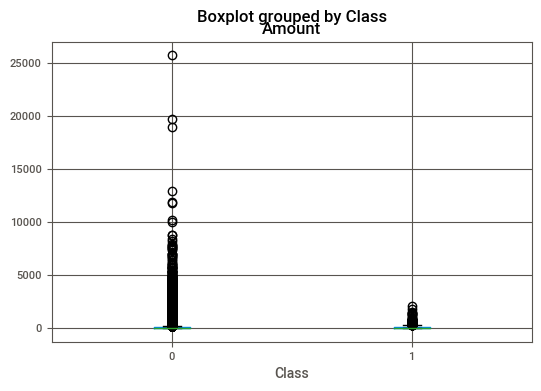

In [23]:
arquivo.boxplot(column=['Amount'], by='Class')

### Remover as transações duplicadas

In [24]:
len(arquivo)

284807

In [25]:
arquivo = arquivo.drop_duplicates()

In [26]:
len(arquivo)

283726

### Função para separar treino e teste

In [27]:
X = arquivo.drop(["Time","Class"],axis = 1)
y = arquivo['Class']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [56]:
print(len(X_train))
print(len(X_test))

198608
85118


In [57]:
print(list(y_train).count(1))
print(list(y_train).count(0))

335
198273


In [58]:
print(list(y_test).count(1))
print(list(y_test).count(0))

138
84980


### Balanceamento da base

In [59]:
X_train_ori, Y_train_ori = X_train,y_train

In [60]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train, y_train = undersample.fit_resample(X_train, y_train)    

In [61]:
print(list(y_train).count(1))
print(list(y_train).count(0))

335
335


## Regressão logística

In [98]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
y_pred_log = logreg_clf.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
def ks(modelo, X, Y):
    #predicao das classes positivas (1) da variável resposta
    preds_pos = modelo.predict_proba(X)[:,1] 
    #separa as probabilidades dado que o evento realmente ocorreu, e dado que o evento não ocorreu
    pos_preds_pos = preds_pos[Y == 1]
    nul_preds_pos = preds_pos[Y == 0]
    #calcula o ks, criando as distribuições acumuladas, e encontrando o ponto maior diferenciação entre elas
    ks = ks_2samp(pos_preds_pos, nul_preds_pos)
    return(ks.statistic)

ks_train = ks(logreg_clf, X_train, y_train)
ks_test = ks(logreg_clf, X_test, y_test)

print('Ks Amostra de Treino: ', ks_train)
print('Ks Amostra de Teste: ', ks_test)

Ks Amostra de Treino:  0.9253731343283582
Ks Amostra de Teste:  0.8344205456697399


In [100]:
print(confusion_matrix(y_pred_log, y_test))

[[81088    19]
 [ 3892   119]]


In [101]:
print(accuracy_score(y_pred_log, y_test))

0.9540520218990108


In [102]:
roc_log = roc_auc_score(y_test, y_pred_log)
roc_log

0.9082599145237926

## Árvore de decisão

In [103]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)

In [104]:
ks_train = ks(clf, X_train, y_train)
ks_test = ks(clf, X_test, y_test)

print('Ks Amostra de Treino: ', ks_train)
print('Ks Amostra de Teste: ', ks_test)

Ks Amostra de Treino:  1.0
Ks Amostra de Teste:  0.7778048372848172


In [105]:
print(confusion_matrix(y_pred_tree, y_test))

[[77798    19]
 [ 7182   119]]


In [106]:
print(accuracy_score(y_pred_tree, y_test))

0.9153997979275829


In [107]:
roc_tree = roc_auc_score(y_test, y_pred_tree)
roc_tree

0.8889024186424086

## Análise de discriminante 

In [108]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [109]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

In [110]:
ks_train = ks(lda, X_train, y_train)
ks_test = ks(lda, X_test, y_test)

print('Ks Amostra de Treino: ', ks_train)
print('Ks Amostra de Teste: ', ks_test)

Ks Amostra de Treino:  0.8776119402985074
Ks Amostra de Teste:  0.8528859305343798


In [111]:
print(confusion_matrix(y_pred_lda, y_test))

[[83767    23]
 [ 1213   115]]


In [112]:
print(accuracy_score(y_pred_lda, y_test))

0.9854789821189408


In [113]:
roc_lda = roc_auc_score(y_test, y_pred_lda)
roc_lda

0.9095296932611595

## Modelo SVM

In [114]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [115]:
print(confusion_matrix(y_pred_svm, y_test))

[[79407    47]
 [ 5573    91]]


In [116]:
print(accuracy_score(y_pred_svm, y_test))

0.9339740125472873


In [117]:
roc_svm = roc_auc_score(y_test, y_pred_svm)
roc_svm

0.7969200766761829

## Comparação dos modelos

In [118]:
models = pd.DataFrame()
modelos = ['Regressão logística', 'Árvore de decisão', 'Análise de discriminante',  'Modelo SVM']
roc = [roc_log, roc_tree, roc_lda, roc_svm]

models['modelos'] = modelos
models['roc'] = roc

In [119]:
models.sort_values(by='roc', ascending=False)

,modelos,roc
2,Análise de discriminante,0.909530
0,Regressão logística,0.908260
1,Árvore de decisão,0.888902
3,Modelo SVM,0.796920


### Análise de cutoff

In [118]:
def tx_por_decil(scores_tr, scores_ts, aux_tr, aux_ts,
                y_tr, y_ts):
    #separa o score em 10 faixas, criando assim, as faixas dos decis
    scores, bins = pd.qcut(scores_tr, q = 10, retbins = True)
    
    #inicializa as taxas 
    taxa_tr = list()
    taxa_ts = list()

    taxa_mau_tr = list()
    taxa_mau_ts = list()

    final = 9

    for i in range(0,10):
        #em cada iteração do loop, calcula o percentual de volume, e a taxa de eventos da variável resposta, 
        #de cada faixa
        if i == 0:
            taxa_tr.append(sum(aux_tr[(scores_tr > 0) & (scores_tr <= bins[1])])/len(aux_tr))

            taxa_ts.append(sum(aux_ts[(scores_ts > 0) & (scores_ts <= bins[1])])/len(aux_ts))


            taxa_mau_tr.append(sum(y_tr.loc[np.array((scores_tr > 0) & (scores_tr <= bins[1]))])/
                                len(y_tr.loc[np.array((scores_tr > 0) & (scores_tr <= bins[1]))]))

            taxa_mau_ts.append(sum(y_ts.loc[np.array((scores_ts > 0) & (scores_ts <= bins[1]))])/
                                len(y_ts.loc[np.array((scores_ts > 0) & (scores_ts <= bins[1]))]))

        elif i == final:
            taxa_tr.append(sum(aux_tr[(scores_tr > bins[i])])/len(aux_tr))

            taxa_ts.append(sum(aux_ts[(scores_ts > bins[i])])/len(aux_ts))


            taxa_mau_tr.append(sum(y_tr.loc[np.array((scores_tr > bins[i]))])/
                                len(y_tr.loc[np.array((scores_tr > bins[i]))]))

            taxa_mau_ts.append(sum(y_ts.loc[np.array((scores_ts > bins[i]))])/
                                len(y_ts.loc[np.array((scores_ts > bins[i]))]))
        else:
            taxa_tr.append(sum(aux_tr[(scores_tr > bins[i]) & (scores_tr <= bins[i + 1])])/len(aux_tr))
            taxa_ts.append(sum(aux_ts[(scores_ts > bins[i]) & (scores_ts <= bins[i + 1])])/len(aux_ts))

            taxa_mau_tr.append(sum(y_tr.loc[np.array((scores_tr > bins[i]) & (scores_tr <= bins[i + 1]))])/
                                len(y_tr.loc[np.array((scores_tr > bins[i]) & (scores_tr <= bins[i + 1]))]))


            taxa_mau_ts.append(sum(y_ts.loc[np.array((scores_ts > bins[i]) & (scores_ts <= bins[i + 1]))])/
                                len(y_ts.loc[np.array((scores_ts > bins[i]) & (scores_ts <= bins[i + 1]))]))

    #cria tabelas para serem visualizadas com todos esses dados
    taxas_tr = pd.DataFrame(data = {'Faixa': list(scores.categories),
                                    '%': taxa_tr,
                                    'Taxa de eventos positivos': taxa_mau_tr})
    taxas_ts = pd.DataFrame(data = {'Faixa': list(scores.categories),
                                     '%': taxa_ts,
                                     'Taxa de eventos positivos': taxa_mau_ts})
    return(taxas_tr, taxas_ts)


tr, ts = tx_por_decil(lda.predict_proba(X_train)[:,1],
                           lda.predict_proba(X_test)[:,1], 
                           np.ones(shape = X_train.shape[0]), 
                           np.ones(shape = X_test.shape[0]), 
                           y_train, 
                           y_test)


In [119]:
tr

,Faixa,%,Taxa de eventos positivos
0,"(-0.001, 5.109999999999998e-149]",0.100003,0.000000
1,"(5.109999999999998e-149, 1.3799999999999993e-148]",0.099998,0.000000
2,"(1.3799999999999993e-148, 2.4199999999999988e-...",0.099998,0.000000
3,"(2.4199999999999988e-148, 3.899999999999998e-148]",0.100003,0.000050
4,"(3.899999999999998e-148, 6.189999999999997e-148]",0.099998,0.000100
5,"(6.189999999999997e-148, 1.0899999999999994e-147]",0.099998,0.000100
6,"(1.0899999999999994e-147, 2.5899999999999986e-...",0.100003,0.000150
7,"(2.5899999999999986e-147, 1.0399999999999993e-...",0.099998,0.000150
8,"(1.0399999999999993e-146, 1.8099999999999986e-...",0.099998,0.000351
9,"(1.8099999999999986e-145, 1.0]",0.100003,0.015699


In [120]:
ts

,Faixa,%,Taxa de eventos positivos
0,"(-0.001, 5.109999999999998e-149]",0.099762,0.000000
1,"(5.109999999999998e-149, 1.3799999999999993e-148]",0.098674,0.000000
2,"(1.3799999999999993e-148, 2.4199999999999988e-...",0.097972,0.000000
3,"(2.4199999999999988e-148, 3.899999999999998e-148]",0.099528,0.000000
4,"(3.899999999999998e-148, 6.189999999999997e-148]",0.100371,0.000000
5,"(6.189999999999997e-148, 1.0899999999999994e-147]",0.102454,0.000000
6,"(1.0899999999999994e-147, 2.5899999999999986e-...",0.100944,0.000348
7,"(2.5899999999999986e-147, 1.0399999999999993e-...",0.100769,0.000232
8,"(1.0399999999999993e-146, 1.8099999999999986e-...",0.098463,0.000832
9,"(1.8099999999999986e-145, 1.0]",0.101062,0.017255


In [121]:
def calcula_metricas_matriz(mat):
    acc = (mat[0,0] + mat[1,1])/sum(sum(mat)) #acurácia
    spe = (mat[0,0])/(mat[0,0] + mat[1,0]) #especificidade
    sen = (mat[1,1])/(mat[1,1] + mat[0,1]) #sensibilidade
    print("Acurácia: ", acc)
    print("Sensibilidade: ", sen)
    print("Especificidade: ", spe)

print("Métricas da base de treino:")
mat_train = confusion_matrix(y_train, lda.predict(X_train))
calcula_metricas_matriz(mat_train)
print("\n")

print("Métricas da base de teste:")
mat_test = confusion_matrix(y_test, lda.predict(X_test))
calcula_metricas_matriz(mat_test)

Métricas da base de treino:
Acurácia:  0.999347926405971
Sensibilidade:  0.845360824742268
Especificidade:  0.9995730209521131


Métricas da base de teste:
Acurácia:  0.9992860737567735
Sensibilidade:  0.890625
Especificidade:  0.9994491003926624
